# Paleontology Machine Learning Project


In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics
#import google.colab
#from google.colab import files
#uploaded = files.upload()

  # Processing data

In [16]:
data = pd.read_csv('thegigafile.csv')

In [17]:
#Vizualising data 
data

,max_ma,min_ma,genus,lng,lat,paleolng,paleolat,lithology1,composition
0,353.8,345.3,Australosutura,-98.099998,31.000000,-65.59,-27.46,"""carbonate""","low Mg calcite, chitin"
1,353.8,345.3,Carbonocoryphe,-98.099998,31.000000,-65.59,-27.46,"""carbonate""","low Mg calcite, chitin"
2,353.8,345.3,Thigriffides,-98.099998,31.000000,-65.59,-27.46,"""carbonate""","low Mg calcite, chitin"
3,353.8,345.3,Pudoproetus,-98.099998,31.000000,-65.59,-27.46,"""carbonate""","low Mg calcite, chitin"
4,353.8,345.3,Pudoproetus,-98.099998,31.000000,-65.59,-27.46,"""carbonate""","low Mg calcite, chitin"
...,...,...,...,...,...,...,...,...,...
743654,99.6,93.5,Lepicerus,96.720001,26.360001,105.50,8.29,amber,chitin
743655,468.1,460.9,Eremotoechia,-86.784721,33.311111,-114.63,-8.13,"""limestone""",low Mg calcite
743656,467.3,458.4,Eremotoechia,-84.129166,35.741669,-112.38,-10.30,"""limestone""",low Mg calcite
743657,467.3,458.4,Eremotoechia,-84.125000,35.750000,-112.37,-10.29,"""limestone""",low Mg calcite


In [18]:
print(len(data.columns))

9


# K-nearest neighbor method  1D (Space/Genus)


In [19]:
#Import stuff for k-nearest neighbor 
import sklearn.neighbors
import sklearn.linear_model
from sklearn.utils import shuffle
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#from mpl_toolkits.basemap import Basemap




In [20]:

#Test here on only three data frame
new_table = data[['lng', 'lat', 'genus']].copy()


In [21]:
new_table

,lng,lat,genus
0,-98.099998,31.000000,Australosutura
1,-98.099998,31.000000,Carbonocoryphe
2,-98.099998,31.000000,Thigriffides
3,-98.099998,31.000000,Pudoproetus
4,-98.099998,31.000000,Pudoproetus
...,...,...,...
743654,96.720001,26.360001,Lepicerus
743655,-86.784721,33.311111,Eremotoechia
743656,-84.129166,35.741669,Eremotoechia
743657,-84.125000,35.750000,Eremotoechia


# 1) Using k-nearest neighbor with 3 genuses 

##Look at the most occurences of genuses 

In [34]:
genus_counts = new_table['genus'].value_counts().reset_index()
genus_counts.columns = ['genus', 'count']
genus_counts = genus_counts.sort_values(by='count', ascending=False)

# Print the ranking
print("Ranking of genera with the most occurrences:")
for index, row in genus_counts.iterrows():
    print(f"{index+1}. {row['genus']}: {row['count']} occurrences")

Ranking of genera with the most occurrences:
1. Ostrea: 1828 occurrences
2. Composita: 1722 occurrences
3. Chlamys: 1531 occurrences
4. Inoceramus: 1368 occurrences
5. Derbyia: 1330 occurrences
6. Panderodus: 1316 occurrences
7. Nuculana: 1256 occurrences
8. Polygnathus: 1184 occurrences
9. Cleiothyridina: 1172 occurrences
10. Modiolus: 1120 occurrences
11. Favosites: 1092 occurrences
12. Atrypa: 1092 occurrences
13. Ozarkodina: 1081 occurrences
14. Dentalium: 1080 occurrences
15. Anomia: 1076 occurrences
16. Hustedia: 1075 occurrences
17. Glycymeris: 1052 occurrences
18. Bairdia: 1021 occurrences
19. Lingula: 1008 occurrences
20. Isotelus: 1001 occurrences
21. Linoproductus: 995 occurrences
22. Astarte: 957 occurrences
23. Plagiostoma: 941 occurrences
24. Porites: 923 occurrences
25. Neospirifer: 869 occurrences
26. Camptonectes: 852 occurrences
27. Palaeoneilo: 847 occurrences
28. Corbula: 846 occurrences
29. Euspira: 838 occurrences
30. Nucula: 837 occurrences
31. Platystrophia: 830

5602. Corinna: 27 occurrences
5583. Hyphantoceras: 27 occurrences
5582. Fistulamina: 27 occurrences
5581. Aconeceras: 27 occurrences
5570. Bradyphyllum: 27 occurrences
5647. Pyxidicula: 27 occurrences
5563. Ivanovia: 27 occurrences
5564. Pisidium: 27 occurrences
5565. Roemeripora: 27 occurrences
5566. Tunstallia: 27 occurrences
5567. Vagrania: 27 occurrences
5568. Necrotaulius: 27 occurrences
5569. Mucophyllum: 27 occurrences
5571. Caryophyllia (Ceratocyathus): 27 occurrences
5580. Lochmaeosmilia: 27 occurrences
5572. Bathyarca: 27 occurrences
5573. Protorcula: 27 occurrences
5574. Lathrobium: 27 occurrences
5575. Marrella: 27 occurrences
5576. Schlotheimia: 27 occurrences
5577. Pseudacanthocircus: 27 occurrences
5578. Grandinasus: 27 occurrences
5579. Pseudodunbarula: 27 occurrences
5603. Miraspis: 27 occurrences
5562. Eopelobates: 27 occurrences
5605. Meginoceras: 27 occurrences
5638. Amara: 27 occurrences
5629. Phasianella: 27 occurrences
5630. Deacheospira: 27 occurrences
5631. Cyp

12100. Kellerella: 10 occurrences
12101. Inella: 10 occurrences
12126. Cyanocitta: 10 occurrences
12127. Dremotherium: 10 occurrences
12128. Lepophidium: 10 occurrences
12129. Notomeryx: 10 occurrences
12130. Elianella: 10 occurrences
12131. Kathleenella: 10 occurrences
12132. Anechocephalus: 10 occurrences
12134. Parapulchratia: 10 occurrences
12135. Dentex: 10 occurrences
12136. Pseudotetrasauropus: 10 occurrences
12137. Uronectes: 10 occurrences
12138. Undularia: 10 occurrences
12139. Phyllodus: 10 occurrences
12140. Trachinus: 10 occurrences
12141. Amecystis: 10 occurrences
12142. Pachygaleus: 10 occurrences
12143. Onymagnostus: 10 occurrences
12144. Isurolamna: 10 occurrences
12145. Iridomyrmex: 10 occurrences
12146. Chlorostoma (Omphalius): 10 occurrences
12147. Mycomya: 10 occurrences
12125. Sympolycyclus: 10 occurrences
12124. Tcherskidium: 10 occurrences
12123. Spirigera: 10 occurrences
12111. Tauromeniceras: 10 occurrences
12102. Spirina: 10 occurrences
12103. Bdelloidina: 10

18802. Drymarchon: 5 occurrences
18641. Caseodus: 5 occurrences
18640. Cyanoramphus: 5 occurrences
18639. Agniesella: 5 occurrences
18638. Katzeria: 5 occurrences
18637. Paracucumarites: 5 occurrences
18636. Falcatus: 5 occurrences
18635. Dinornis: 5 occurrences
18634. Stortophyllum: 5 occurrences
18633. Flabellosmilia: 5 occurrences
18632. Rogorthis: 5 occurrences
18631. Taphacris: 5 occurrences
18630. Aspidograptus: 5 occurrences
18629. Kungalaria: 5 occurrences
18628. Zeacolpus (Zeacolpus): 5 occurrences
18627. Epinephelus: 5 occurrences
18626. Botrioides: 5 occurrences
18625. Notocearagryllus: 5 occurrences
18624. Alauda: 5 occurrences
18623. Zessinia: 5 occurrences
18622. Tanytrachelos: 5 occurrences
18621. Acaenasuchus: 5 occurrences
18620. Lufengospira: 5 occurrences
18619. Austrovenus: 5 occurrences
18618. Amalda (Alocospira): 5 occurrences
18617. Lindstroemella: 5 occurrences
18616. Callosciurus: 5 occurrences
18615. Palaeotachea: 5 occurrences
18614. Sinoconodon: 5 occurrence

25394. Waijiaoella: 3 occurrences
25395. Goniodontomys: 3 occurrences
25396. Capromys: 3 occurrences
25397. Spathipora: 3 occurrences
25398. Terebripora: 3 occurrences
25399. Phoberocyon: 3 occurrences
25400. Membranacyathus: 3 occurrences
25401. Cachiyacuy: 3 occurrences
25402. Mochlonyx: 3 occurrences
25403. Boardmanella: 3 occurrences
25404. Trematosuchus: 3 occurrences
25405. Cataulacus: 3 occurrences
25437. Apsilocephala: 3 occurrences
25439. Nesomyrmex: 3 occurrences
25500. Moghreberia: 3 occurrences
25470. Trichosia (Archaeosciara): 3 occurrences
25472. Stictoporellina: 3 occurrences
25473. Kolponomos: 3 occurrences
25474. Cratomyia: 3 occurrences
25475. Iberonepa: 3 occurrences
25476. Phlebotomites: 3 occurrences
25477. Phyloblatta (Phyloblatta): 3 occurrences
25478. Uzbekbaatar: 3 occurrences
25479. Callidium: 3 occurrences
25480. Huabeitendipes: 3 occurrences
25481. Gansuplecia: 3 occurrences
25482. Pareuryomma: 3 occurrences
25483. Okapia: 3 occurrences
25484. Lamia: 3 occur

27140. Parasulcatinella: 2 occurrences
27163. Pronothrotherium: 2 occurrences
27164. Rhaetomyia: 2 occurrences
27165. Mesomegaloprepus: 2 occurrences
27178. Lygistorrhina: 2 occurrences
27188. Beaufortiscus: 2 occurrences
27187. Eudmetoceras (Eudmetoceras): 2 occurrences
27186. Protoecotraustes: 2 occurrences
27185. Microscleromys: 2 occurrences
27184. Yakutosirenites: 2 occurrences
27183. Conoteuthis: 2 occurrences
27182. Dyscritoceras: 2 occurrences
27181. Ledomyia: 2 occurrences
27180. Phatnoma: 2 occurrences
27179. Didymia: 2 occurrences
27177. Prostomis: 2 occurrences
27166. Arctogephyra: 2 occurrences
27176. Stilobezzia (Stilobezzia): 2 occurrences
27175. Ectemnia: 2 occurrences
27174. Heraclites: 2 occurrences
27173. Taeniurites: 2 occurrences
27172. Yunnanocopia: 2 occurrences
27171. Triasorhynchia: 2 occurrences
27170. Clivuloturris: 2 occurrences
27169. Lithosomus: 2 occurrences
27168. Eonathorstites: 2 occurrences
27167. Kroeberiella: 2 occurrences
27139. Aenigmocoleus: 2 oc

43572. Xylechinus: 1 occurrences
43578. Hemichenopus: 1 occurrences
43577. Adsumyia: 1 occurrences
43576. Phileosimias: 1 occurrences
43575. Kovaleviola: 1 occurrences
43574. Spungisiola: 1 occurrences
43573. Gratomyia: 1 occurrences
43571. Bugtipithecus: 1 occurrences
43564. Dauciconus: 1 occurrences
43570. Amiantis (Amiantis): 1 occurrences
43569. Rhodesispongia: 1 occurrences
43568. Amblonyx: 1 occurrences
43567. Malumispongium: 1 occurrences
43566. Stenoscytina: 1 occurrences
43565. Permodiphthera: 1 occurrences
43170. Oryctothemis: 1 occurrences
43168. Olindalacerta: 1 occurrences
43767. Tubulostrophia: 1 occurrences
42775. Dracospongia: 1 occurrences
42773. Elmoboria: 1 occurrences
42772. Eostromatopora: 1 occurrences
42771. Byakudansauropus: 1 occurrences
42770. Sogdothemis: 1 occurrences
42769. Itsukisauropus: 1 occurrences
42768. Leridatoma: 1 occurrences
42767. Cretephialtites: 1 occurrences
42766. Fukuititan: 1 occurrences
42765. Antiquanabittacus: 1 occurrences
42764. Argen

48797. Pegaster: 1 occurrences
48702. Dantiscanus: 1 occurrences
48701. Pammiges: 1 occurrences
48700. Pantobatrisus: 1 occurrences
48607. Psalidocyon: 1 occurrences
48605. Cerambycinus: 1 occurrences
48604. Parasilphites: 1 occurrences
48603. Oryctites: 1 occurrences
48602. Dactylocalyx: 1 occurrences
48601. Chlaeniopsis: 1 occurrences
48600. Hadanechura: 1 occurrences
48599. Progeotrupes: 1 occurrences
48598. Prochrysomela: 1 occurrences
48597. Parachauliodites: 1 occurrences
48596. Anapiptus: 1 occurrences
48595. Dvinopedes: 1 occurrences
48594. Klyazmia: 1 occurrences
48593. Halticophana: 1 occurrences
48592. Carabidium: 1 occurrences
48591. Carabicina: 1 occurrences
48606. Cerylonopsis: 1 occurrences
48608. Qingyaniola: 1 occurrences
48699. Protoscalidion: 1 occurrences
48609. Oxyidris: 1 occurrences
48624. Protonema: 1 occurrences
48623. Plionycteris: 1 occurrences
48622. Manobiomorpha: 1 occurrences
48621. Paleophaedon: 1 occurrences
48620. Psephosyllogus: 1 occurrences
48619. K

40680. Atlantida: 1 occurrences
40679. Baltorussus: 1 occurrences
40678. Gemuendenaspis: 1 occurrences
40677. Gemuendina: 1 occurrences
40676. Acanthechinus: 1 occurrences
40675. Nessariostoma: 1 occurrences
40674. Sphenaster: 1 occurrences
40673. Mesococcus: 1 occurrences
40672. Pseudopetalichthys: 1 occurrences
40671. Schedodendrothrips: 1 occurrences
40670. Holarthrothrips: 1 occurrences
40669. Ecommocydromia: 1 occurrences
40668. Henriksenopterix: 1 occurrences
40667. Eoricania: 1 occurrences
40682. Protolispothrips: 1 occurrences
40684. Sinodictyna: 1 occurrences
40702. Neomysorex: 1 occurrences
40685. Huabeius: 1 occurrences
40700. Hypopsia: 1 occurrences
40699. Elsornis: 1 occurrences
40698. Montirictus: 1 occurrences
40697. Kuwajimalla: 1 occurrences
40696. Albalophosaurus: 1 occurrences
40695. Hakusanodon: 1 occurrences
40694. Caccobius: 1 occurrences
40693. Ziapelta: 1 occurrences
40692. Leinia: 1 occurrences
40691. Deronectes: 1 occurrences
40690. Ophonus (Metophonus): 1 occ

In [35]:
filtered_table = new_table[new_table['genus'].isin(['Eremotoechia', 'Pudoproetus', 'Carbonocoryphe'])]

In [36]:
filtered_table 
len(filtered_table)

38

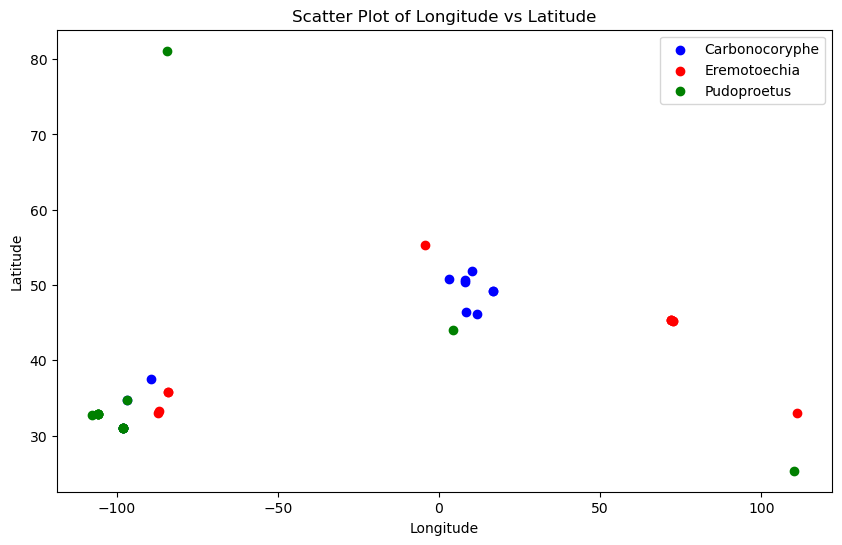

In [37]:


color_map = {
    'Carbonocoryphe': 'blue',
    'Pudoproetus': 'green',
    'Eremotoechia': 'red'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))
for genus, group in filtered_table.groupby('genus'):
    plt.scatter(group['lng'], group['lat'], label=genus, color=color_map[genus])

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs Latitude')
plt.legend()

# Show the plot
plt.show()

In [38]:
# Get the number of rows in the DataFrame
total_rows = len(filtered_table)

# Select the indices for training and testing sets
train_indices = list(range(total_rows - 10))  # Use all rows except the last 10 for training
test_indices = list(range(total_rows - 10, total_rows))  # Use the last 10 rows for testing

# Split the DataFrame into training and testing sets
x_train = filtered_table.iloc[train_indices][['lng', 'lat']]  # Assuming 'lng' and 'lat' are the features
y_train = filtered_table.iloc[train_indices]['genus']
x_test = filtered_table.iloc[test_indices][['lng', 'lat']]
y_test = filtered_table.iloc[test_indices]['genus']


#try to use k-nearest neighbor on simple data 
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=2)
model.fit(X=x_train, y=y_train)# --> modify this line to get something better ? 

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5


In [39]:
filtered_table2 = new_table[new_table['genus'].isin(['Ostrea', 'Composita', 'Chlamys'])]

In [45]:
filtered_table2= filtered_table2.sample(frac=1).reset_index(drop=True)
len(filtered_table2)

5081

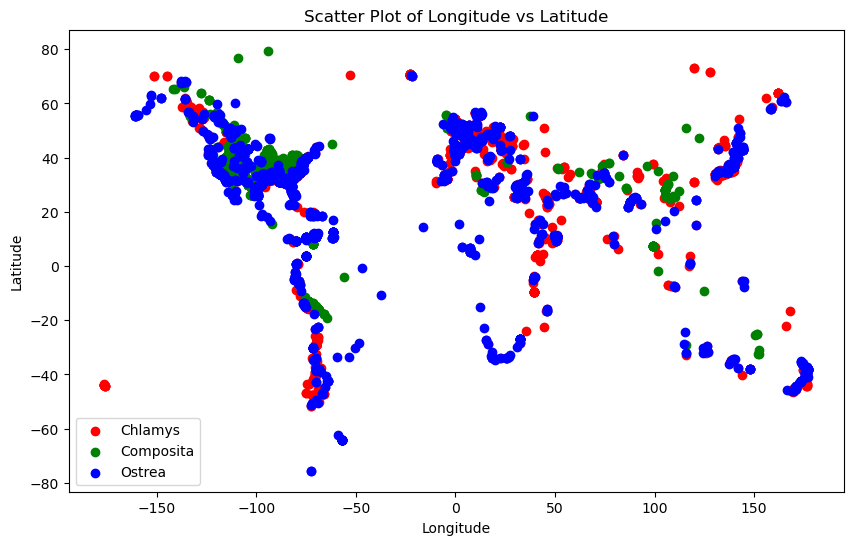

In [46]:
color_map = {
    'Ostrea': 'blue',
    'Composita': 'green',
    'Chlamys': 'red'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))
for genus, group in filtered_table2.groupby('genus'):
    plt.scatter(group['lng'], group['lat'], label=genus, color=color_map[genus])

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs Latitude')
plt.legend()

# Show the plot
plt.show()

In [47]:
# Get the number of rows in the DataFrame
total_rows = len(filtered_table2)

# Select the indices for training and testing sets
train_indices = list(range(total_rows - 10))  # Use all rows except the last 10 for training
test_indices = list(range(total_rows - 10, total_rows))  # Use the last 10 rows for testing

# Split the DataFrame into training and testing sets
x_train = filtered_table2.iloc[train_indices][['lng', 'lat']]  # Assuming 'lng' and 'lat' are the features
y_train = filtered_table2.iloc[train_indices]['genus']
x_test = filtered_table2.iloc[test_indices][['lng', 'lat']]
y_test = filtered_table2.iloc[test_indices]['genus']


#try to use k-nearest neighbor on simple data 
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=2)
model.fit(X=x_train, y=y_train)# --> modify this line to get something better ? 

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7


# 2) k nearest neighbor 3D (Space/ Time/ genuses)

# 3) Logistic regression 